In [17]:
#import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load the dataset
data = pd.read_csv("codsofttitanicsurvivaldataset.csv", delimiter=',') 

In [19]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 31.1+ KB
None


In [20]:
# Display the first few rows of the dataset
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [21]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
# Handle missing values in Age column using median
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

# Handle missing values in Fare column using mean
mean_fare = data['Fare'].mean()
data['Fare'].fillna(mean_fare, inplace=True)

# Handle the "Cabin" column
label_encoder = LabelEncoder()
data["Cabin"].fillna("Unknown", inplace=True)  # Fill missing values with "Unknown"
data["Cabin_Deck"] = data["Cabin"].str[0]  # Extract the first character as the deck
data["Cabin_Deck"] = label_encoder.fit_transform(data["Cabin_Deck"])


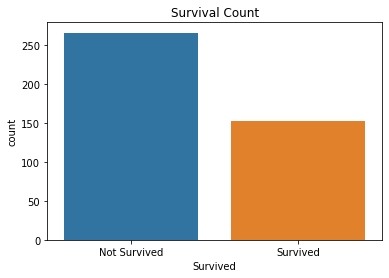

In [25]:
# Data visualization
# # Visualize the count of survivors
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

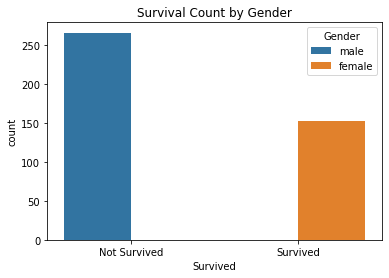

In [27]:
# Visualize the survival count based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival Count by Gender")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Gender')
plt.show()

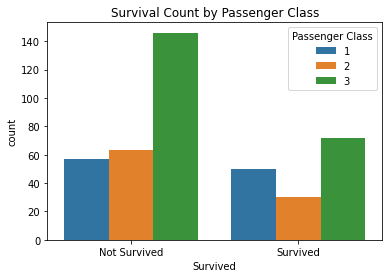

In [29]:
# Visualize the survival count based on passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival Count by Passenger Class")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.legend(title='Passenger Class')
plt.show()

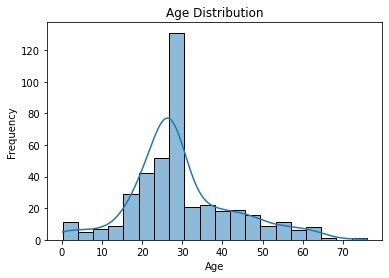

In [31]:
# Visualize the distribution of ages
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

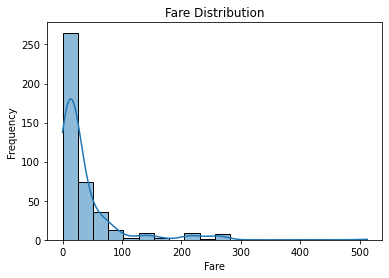

In [33]:
# Visualize the fare distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Fare', bins=20, kde=True)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

In [37]:
# Convert categorical variables to numerical
data["Sex"] = label_encoder.fit_transform(data["Sex"])
data["Embarked"] = label_encoder.fit_transform(data["Embarked"])
data["Cabin"] = label_encoder.fit_transform(data["Cabin"])

In [42]:
# Define the features and target variable
features = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]
target = "Survived"

In [43]:
# Create the feature matrix X and target vector y
X = data[features]
y = data[target]

In [45]:
print(X)

     PassengerId  Pclass  Sex   Age  SibSp  Parch      Fare  Cabin  Embarked
0            892       3    1  34.5      0      0    7.8292     76         1
1            893       3    0  47.0      1      0    7.0000     76         2
2            894       2    1  62.0      0      0    9.6875     76         1
3            895       3    1  27.0      0      0    8.6625     76         2
4            896       3    0  22.0      1      1   12.2875     76         2
..           ...     ...  ...   ...    ...    ...       ...    ...       ...
413         1305       3    1  27.0      0      0    8.0500     76         2
414         1306       1    0  39.0      0      0  108.9000     22         0
415         1307       3    1  38.5      0      0    7.2500     76         2
416         1308       3    1  27.0      0      0    8.0500     76         2
417         1309       3    1  27.0      1      1   22.3583     76         0

[418 rows x 9 columns]


In [47]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [49]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions
y_pred = model.predict(X_test)


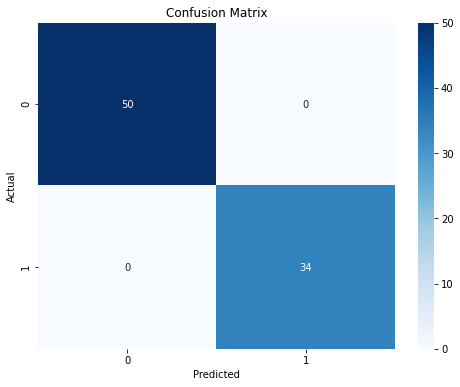

In [62]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [63]:
# Displaying the Predictions
for PassengerId, prediction, actual in zip(X_test['PassengerId'], y_pred, y_test):
    prediction_label = 'Survived' if prediction == 1 else 'Did not survive'
    actual_label = 'Survived' if actual == 1 else 'Did not survive'
    print(f"Passenger {PassengerId}: Prediction - {prediction_label}, Actual - {actual_label}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a prediction analysis report
print("\nModel Evaluation Report:")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Passenger 1213: Prediction - Did not survive, Actual - Did not survive
Passenger 1216: Prediction - Survived, Actual - Survived
Passenger 1280: Prediction - Did not survive, Actual - Did not survive
Passenger 948: Prediction - Did not survive, Actual - Did not survive
Passenger 1045: Prediction - Survived, Actual - Survived
Passenger 922: Prediction - Did not survive, Actual - Did not survive
Passenger 964: Prediction - Survived, Actual - Survived
Passenger 974: Prediction - Did not survive, Actual - Did not survive
Passenger 1150: Prediction - Survived, Actual - Survived
Passenger 1308: Prediction - Did not survive, Actual - Did not survive
Passenger 901: Prediction - Did not survive, Actual - Did not survive
Passenger 1283: Prediction - Survived, Actual - Survived
Passenger 996: Prediction - Survived, Actual - Survived
Passenger 1306: Prediction - Survived, Actual - Survived
Passenger 1305: Prediction - Did not survive, Actual - Did not survive
Passenger 931: Prediction - Did not sur